# Random Forest Classifier - Label 1

Classification on Label 1 (zooplankton vs detritus).

In [ ]:
# delete variables in memory
%reset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Load the data which have been preprocessed in R.

In [2]:
train = pd.read_csv("../../../data/processed/labelled-features/labelled-features-train.csv")
train = train.set_index('index')

test = pd.read_csv("../../../data/processed/labelled-features/labelled-features-test.csv")
test = test.set_index('index')

In [3]:
print(train["label1"].unique())

['zooplankton' 'detritus']


In [4]:
for col in train.columns:
    print(col)

filename
label1
label2
label3
object_label
object_width
object_height
object_bx
object_by
object_circ.
object_area_exc
object_area
object_%area
object_major
object_minor
object_y
object_x
object_convex_area
object_min
object_max
object_mean
object_intden
object_perim.
object_elongation
object_range
object_perimareaexc
object_perimmajor
object_circex
object_angle
object_bounding_box_area
object_eccentricity
object_equivalent_diameter
object_euler_number
object_extent
object_local_centroid_col
object_local_centroid_row
object_solidity
img_file_name
img_rank


These are the columns we are retaining in the features matrix (X)

In [5]:
cols_retain = [ col for col in train.columns if col not in ['filename', 'label1', 'label2', 'label3',
                                                           'img_file_name', 'img_rank'] ]

In [6]:
for col in cols_retain:
    print(col)

object_label
object_width
object_height
object_bx
object_by
object_circ.
object_area_exc
object_area
object_%area
object_major
object_minor
object_y
object_x
object_convex_area
object_min
object_max
object_mean
object_intden
object_perim.
object_elongation
object_range
object_perimareaexc
object_perimmajor
object_circex
object_angle
object_bounding_box_area
object_eccentricity
object_equivalent_diameter
object_euler_number
object_extent
object_local_centroid_col
object_local_centroid_row
object_solidity


Define train and test matrices. First encode labeles.

In [7]:
# Encode taget labels with value between 0 and n_classes-1
LE = LabelEncoder()
LE.fit( train['label1'] ) # fit label encoder
y_train = LE.transform( train['label1'] ) # transform labels to normalized encoding
y_test = LE.transform( test['label1'] ) # transform labels to normalized encoding

Just making sure that the above has worked

In [8]:
( np.sum(y_train == 1) ) == ( np.sum(train['label1'] == 'zooplankton') )

True

In [9]:
( np.sum(y_test == 1) ) == ( np.sum(test['label1'] == 'zooplankton') )

True

In [10]:
X_train = train[cols_retain]  # Features
X_test = test[cols_retain]  # Features

Apply random forest classifier using default settings and make prediction

In [11]:
# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100) # this is the default number of trees in the forest

In [12]:
import time

tic = time.perf_counter()
clf.fit(X_train,y_train) # Train the model using the training sets
toc = time.perf_counter()

print("Time to train model: %.4f seconds" % (toc-tic))

Time to train model: 8.0472 seconds


In [13]:
#Make prediction using features in test set
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

Calculate metrics on the random forest model

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Mean Absolute Error: 0.08535726856740584
Mean Squared Error: 0.08535726856740584
Root Mean Squared Error: 0.2921596627999934
Accuracy: 0.9146427314325941


In [15]:
print(metrics.classification_report(y_test,y_pred, target_names=LE.classes_))

              precision    recall  f1-score   support

    detritus       0.95      0.93      0.94      4000
 zooplankton       0.85      0.87      0.86      1682

    accuracy                           0.91      5682
   macro avg       0.90      0.90      0.90      5682
weighted avg       0.92      0.91      0.92      5682



In [16]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

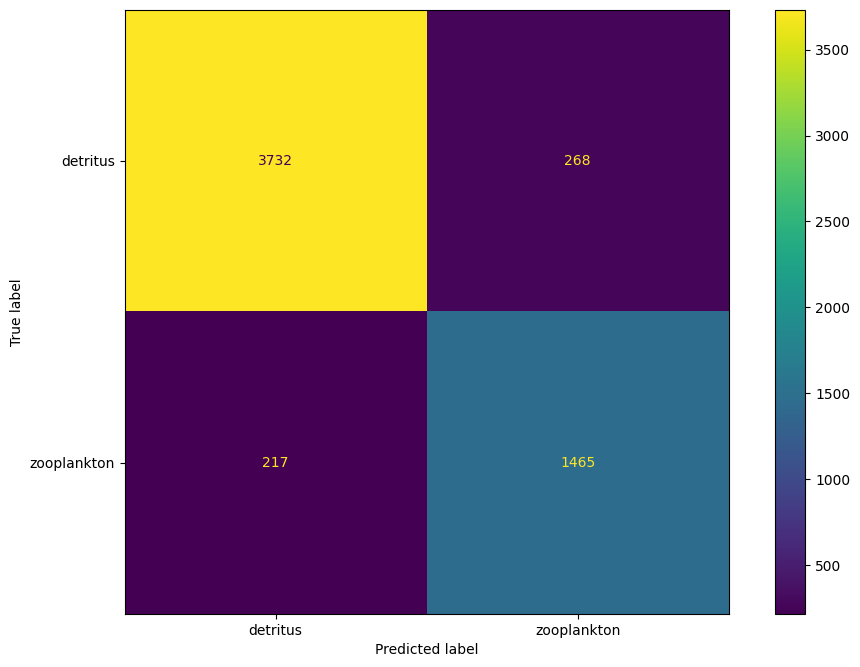

In [17]:
metrics.plot_confusion_matrix(clf, X_test, y_test, display_labels = LE.classes_) 
plt.show()

Find important features for classification

In [18]:
feature_names = X_train.columns
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
print(feature_imp)

object_intden                 0.141006
object_minor                  0.106241
object_local_centroid_col     0.088289
object_x                      0.066073
object_max                    0.057804
object_mean                   0.057229
object_range                  0.054047
object_perimareaexc           0.048893
object_min                    0.048621
object_width                  0.046397
object_bounding_box_area      0.045960
object_area_exc               0.043040
object_convex_area            0.038777
object_equivalent_diameter    0.037669
object_major                  0.020904
object_area                   0.015712
object_perim.                 0.014879
object_height                 0.013374
object_circex                 0.010057
object_perimmajor             0.008298
object_elongation             0.008239
object_y                      0.007390
object_eccentricity           0.007157
object_circ.                  0.007040
object_local_centroid_row     0.005171
object_angle             

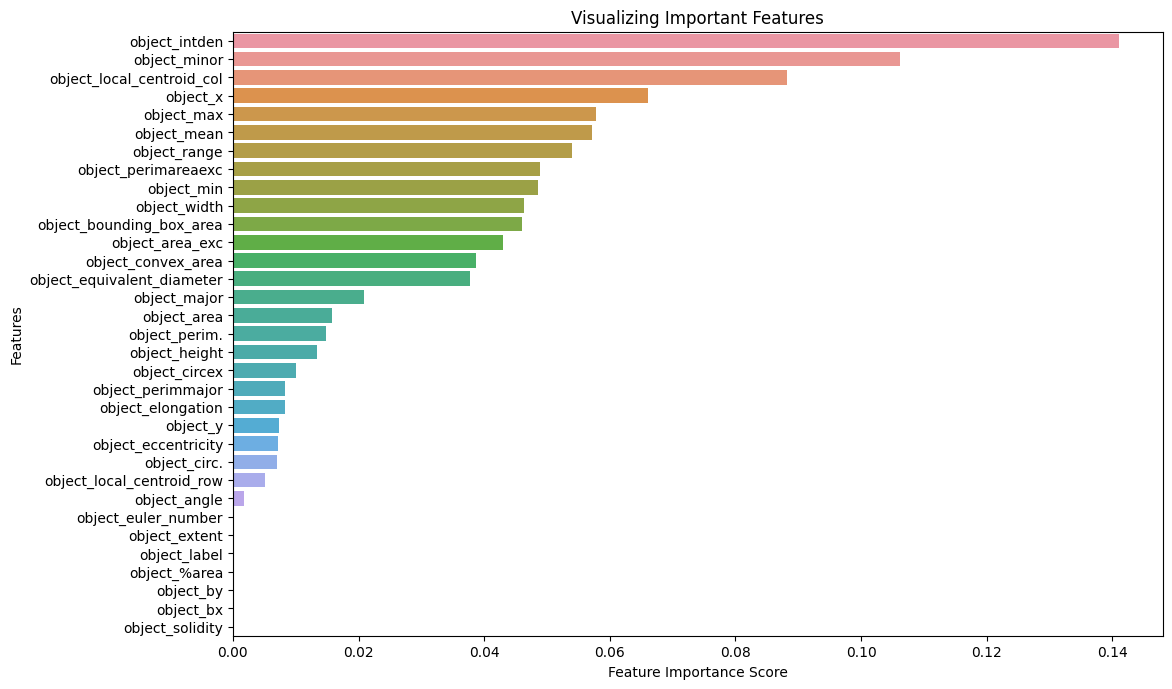

In [19]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

Note that evaluate_model.py must be in the working directory

Plot Precision-Recall Curve - reference: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

RndomForest: f1=0.858 AUC=0.914


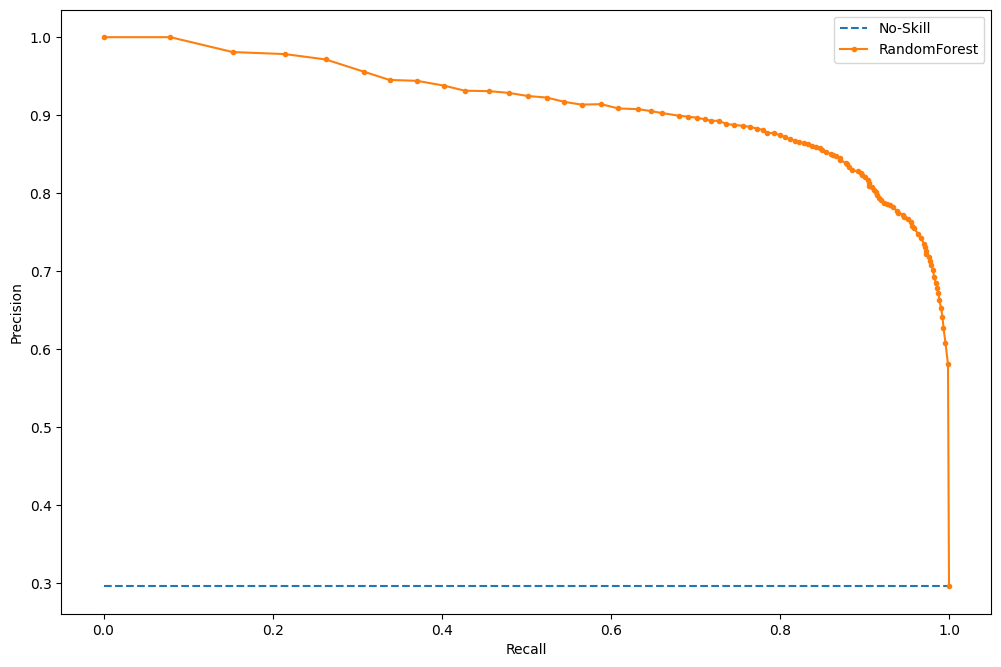

In [20]:
from evaluate_model import plot_precision_recall
fig = plot_precision_recall(clf, X_test, y_test, y_pred)

Plot ROC curve - 
reference: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

ROC AUC=0.968


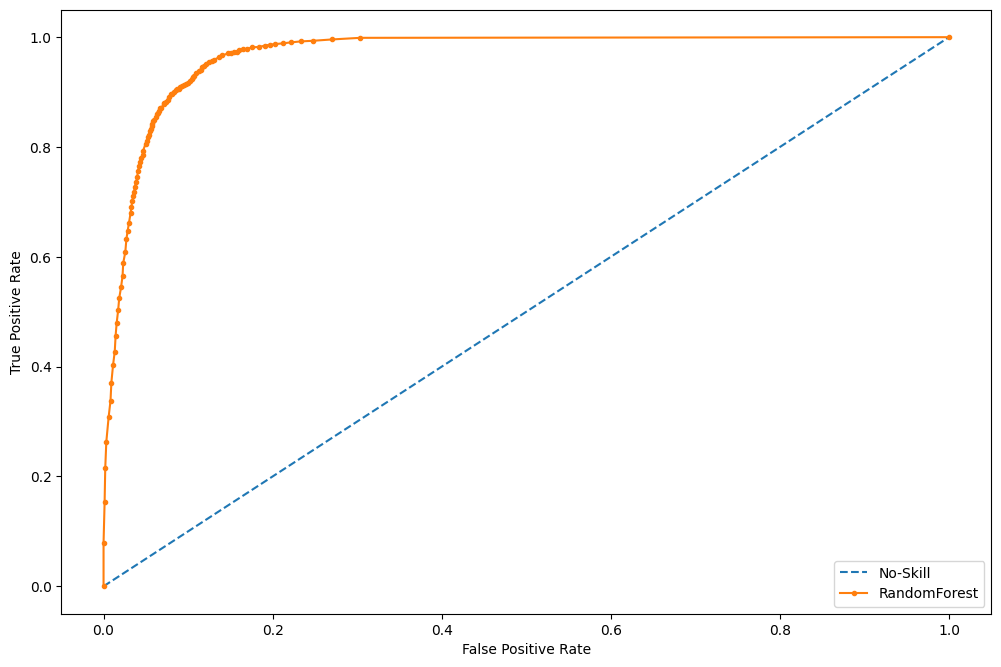

In [21]:
from evaluate_model import plot_roc
fig = plot_roc(clf, X_test, y_test)

The following calculates precision, recall, accuracy and f1 using the pre-computed confusion matrix

In [22]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [25]:
from evaluate_model import model_metrics
accuracy, precision, recall, f1 = model_metrics(confusion_matrix)
print("precision = %.3f" % precision)
print("recall = %.3f" % recall)
print("accuracy = %.3f" % accuracy)
print("f1 = %.3f" % f1)

precision = 0.895
recall = 0.902
accuracy = 0.915
f1 = 0.898


Export pre-trained model as pkl file so that it can later be used in scivision

In [ ]:
with open('/output/models/randomforest/rf-label1.pkl','wb') as f:
    pickle.dump(clf,f)